Final Project

In [1]:
import numpy as np
import pandas as pd
import csv
from scipy.stats import pearsonr
import seaborn as sns

Calibration by Market data

In [2]:
# Load data from CSV file
prices = pd.read_csv('^N225.csv')

# Drop rows with missing values
prices = prices.dropna()

# Sort data in descending order
prices.sort_index(ascending=False, inplace=True)

# Calculate daily returns using logarithmic difference in closing prices
prices['returns'] = np.log(prices['Close'] / prices['Close'].shift(-1))

# Calculate daily standard deviation as volatility
daily_std = np.std(prices['returns'])

# Calculate annualized volatility
trading_days_per_year = 252
annual_std = daily_std * np.sqrt(trading_days_per_year)

# Print the annualized volatility value
print("Annualized volatility for Nikkei-225 is", annual_std)

# Assign annualized volatility value to sigma_s
sigma_s = annual_std

# Continue with your code using the updated sigma_s value

Annualized volatility for Nikkei-225 is 0.19617887298167025


In [3]:
# Load data from CSV file
exchange_rate = pd.read_csv('dollar-yen-exchange-rate-historical.csv')

# Sort data in descending order
exchange_rate.sort_index(ascending=False, inplace=True)

# Calculate daily returns using logarithmic difference in exchange rate values
exchange_rate['returns'] = np.log(exchange_rate['Value'] / exchange_rate['Value'].shift(-1))

# Calculate daily standard deviation as volatility
daily_std_ex = np.std(exchange_rate['returns'])

# Calculate annualized volatility
trading_days_per_year = 252
annual_std_ex = daily_std_ex * np.sqrt(trading_days_per_year)

# Print the annualized volatility value
print("Annualized volatility for USD-JPY exchange rate is", annual_std_ex)

# Assign annualized volatility value to sigma_x
sigma_x = annual_std_ex

Annualized volatility for USD-JPY exchange rate is 0.0758302221156548


In [4]:
# Load data from CSV file
Libor = pd.read_csv('LIBOR USD.csv')

# Calculate daily returns using logarithmic difference in 3M LIBOR rates
Libor['returns'] = np.log(Libor['3M'] / Libor['3M'].shift(-1))

# Calculate daily standard deviation as volatility
Libor_std = np.std(Libor['returns'])

# Calculate annualized volatility
trading_days_per_year = 252
annual_std = Libor_std * np.sqrt(trading_days_per_year)

# Print the annualized volatility value
print("Annualized volatility for LIBOR is", annual_std)

# Assign annualized volatility value to sigma_r
sigma_r = annual_std

# Continue with your code using the updated sigma_r value


Annualized volatility for LIBOR is 0.4393045482529484


In [5]:
Libor_returns= Libor.returns
Libor_returns.dropna()
Libor_returns =Libor_returns[0:1218]
prices_returns = prices.returns
prices_returns= prices_returns.dropna()
ex= exchange_rate['returns'][0:1218]
corr = pearsonr(prices_returns , ex)
print("Correlation between Nikkei-225 and exchange rate is", corr[1])
corr1 = pearsonr(prices_returns , Libor_returns)
print("Correlation between Nikkei-225 Libor rate is", corr1[1])
rho_sx=corr[1]
rho_sr=corr1[1]


Correlation between Nikkei-225 and exchange rate is 0.6281151268508184
Correlation between Nikkei-225 Libor rate is 0.67896121540579


In [6]:
# Load data from CSV file and set 'Date' as the index
T_bond = pd.read_csv('daily-treasury-rates.csv', index_col='Date').dropna()
# Convert '3 Mo' column to numeric type
T_bond['3 Mo'] = pd.to_numeric(T_bond['3 Mo'], errors='coerce')

# Drop rows with '3 Mo' value equal to 0
T_bond = T_bond[T_bond['3 Mo'] != 0]

# Calculate daily returns for '3 Mo' column
T_bond['returns'] = np.log(T_bond['3 Mo'] / T_bond['3 Mo'].shift(-1))

# Calculate daily standard deviation as volatility
daily_std_T = np.std(T_bond['returns'])

# Print the volatility value
print("Volatility for T-bond is", daily_std_T)
T_bond

Volatility for T-bond is 0.16815117162515214


,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,returns
Date,,,,,,,,,,,,,
05/15/2023,5.64,4.97,5.21,5.24,4.73,3.99,3.67,3.46,3.48,3.50,3.92,3.84,-0.007648
05/12/2023,5.79,4.87,5.25,5.16,4.75,3.98,3.65,3.45,3.45,3.46,3.87,3.78,0.009569
05/11/2023,5.81,4.82,5.20,5.14,4.70,3.89,3.56,3.36,3.37,3.39,3.82,3.73,-0.007663
05/10/2023,5.50,4.99,5.24,5.13,4.70,3.90,3.55,3.37,3.40,3.43,3.88,3.80,-0.009497
05/09/2023,5.56,5.16,5.29,5.18,4.81,4.01,3.67,3.51,3.51,3.53,3.94,3.85,-0.003774
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/22/2018,2.18,2.25,2.34,2.49,2.68,2.92,2.99,3.05,3.13,3.20,3.31,3.38,0.012903
10/19/2018,2.19,2.23,2.31,2.48,2.67,2.92,2.99,3.05,3.14,3.20,3.31,3.38,-0.004320
10/18/2018,2.19,2.23,2.32,2.47,2.67,2.87,2.95,3.03,3.11,3.17,3.28,3.36,0.004320


In [7]:
# Given yield curve
yield_curve = {
    "1 Mo": 5.64,
    "2 Mo": 4.97,
    "3 Mo": 5.21,
    "6 Mo": 5.24,
    "1 Yr": 4.73,
    "2 Yr": 3.99,
    "3 Yr": 3.67,
    "4 Yr": 3.46,  
}

# Convert percentages to proportions
for key in yield_curve:
    yield_curve[key] /= 100

# Interpolation function
def interpolate(yield_curve, target):
    keys = list(yield_curve.keys())
    values = list(yield_curve.values())
    
    time_values = [1/12 if "Mo" in key else int(key.split(" ")[0]) for key in keys]
    
    return np.interp(target, time_values, values)

# Calculate the 3-year 
def calculate_forward_rate(yield_curve, m, n):
    S_m = interpolate(yield_curve, m)
    S_n = interpolate(yield_curve, n)
    F_t = ((S_n * n) - (S_m * m)) / (n - m)
    return F_t

# Calculate the 3-year 
forward_rate= calculate_forward_rate(yield_curve,0,3)
print("The 3-year forward 3-month rate is: ", forward_rate)

The 3-year forward 3-month rate is:  0.036699999999999997


Simulate the short rates and stock price by monte carlo simulation

In [8]:
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

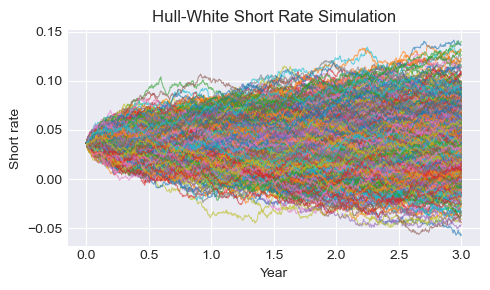

In [9]:
# Hull-White Model Parameters
sigma_HW = 0.02 # Sigma parameter
a_HW = 0.04   # a parameter
length_HW = 3   # Simulation time (in years)
steps_per_year_HW = 252   # Daily basis
steps_HW = length_HW * steps_per_year_HW

# Forward Rate and Evaluation Date
forward_rate_HW = 0.036699999999999997# Forward rate
count_HW = ql.Thirty360(ql.Thirty360.BondBasis)
date_HW = ql.Date(15, 5, 2023)
ql.Settings.instance().evaluationDate = date_HW

# Spot Curve and Yield Term Structure
quote_Handle_HW = ql.QuoteHandle(ql.SimpleQuote(forward_rate_HW))
spot_curve_HW = ql.FlatForward(date_HW, quote_Handle_HW, count_HW)
spot_curve_handle_HW = ql.YieldTermStructureHandle(spot_curve_HW)

# Hull-White Process and Random Number Generation
hw_process_HW = ql.HullWhiteProcess(spot_curve_handle_HW, a_HW, sigma_HW)
rdm_gen_HW = ql.UniformRandomGenerator()
rdm_seq_HW = ql.UniformRandomSequenceGenerator(steps_HW, rdm_gen_HW)
rng_HW = ql.GaussianRandomSequenceGenerator(rdm_seq_HW)
seq_HW = ql.GaussianPathGenerator(hw_process_HW, length_HW, steps_HW, rng_HW, False)

def paths_HW(N):
    arr_HW = np.zeros((N, steps_HW + 1))
    time_HW = np.zeros(steps_HW + 1)  # Initialize the time array outside the loop
    for i in range(N):
        sample_HW = seq_HW.next()
        path_HW = sample_HW.value()
        time_HW = [path_HW.time(j) for j in range(len(path_HW))]
        value_HW = [path_HW[j] for j in range(len(path_HW))]
        arr_HW[i, :] = np.array(value_HW)
    return np.array(time_HW), arr_HW

# Number of Simulations and Path Generation
N_HW = 1000   # Number of simulations
time_HW, paths_HW = paths_HW(N_HW)
rates_HW = pd.DataFrame(paths_HW).T

# Plotting
plt.figure(figsize=(5, 3))  # Adjust the figure size
plt.style.use('seaborn-darkgrid')  # Set the plot style

for i in range(N_HW):
    plt.plot(time_HW, paths_HW[i, :], lw=0.8, alpha=0.6)

plt.title("Hull-White Short Rate Simulation")
plt.ylabel('Short rate')
plt.xlabel('Year')
plt.tight_layout()  # Adjust the layout for better spacing
plt.savefig("HW_rates.pdf")
plt.show()


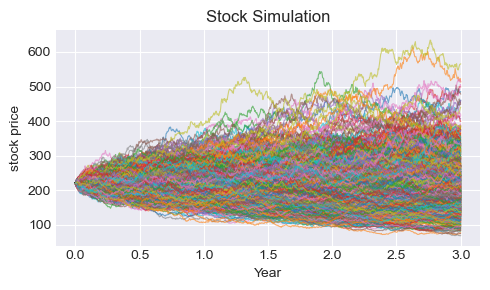

In [10]:
def simulate_stock_price(S0, rf, q, sigma, T, steps, paths):
    dt = T / steps
    drift = (rf - q - 0.5 * sigma**2) * dt
    vol = sigma * np.sqrt(dt)
    
    stock_prices = np.zeros((paths, steps+1))
    stock_prices[:, 0] = S0
    
    for i in range(paths):
        for j in range(1, steps+1):
            epsilon = np.random.normal(0, 1)
            stock_prices[i, j] = stock_prices[i, j-1] * np.exp(drift + vol * epsilon)
    
    return stock_prices

S0= 29842.990234 / 135.7741
T = 3
rf = 0.00505
q = 0.0183
sigma=sigma_s
steps = int(252*T) # Number of time steps
paths = 1000 # Number of Monte Carlo paths

# Simulate stock prices
stock_prices = simulate_stock_price(S0, rf, q, sigma, T, steps, paths)
# Plotting
plt.figure(figsize=(5 ,3))  # Adjust the figure size
plt.style.use('seaborn-darkgrid')  # Set the plot style

for i in range(N_HW):
    plt.plot(time_HW, stock_prices[i, :], lw=0.8, alpha=0.6)

plt.title("Stock Simulation")
plt.ylabel('stock price')
plt.xlabel('Year')
plt.tight_layout()  # Adjust the layout for better spacing
plt.savefig("HW_rates.pdf")
plt.show()


In [11]:
discount_val=np.mean(paths_HW[:,-1])

In [12]:
def calculate_payoff(S, r, T, Delta, k, k_prime):
    n_paths = 1000
    n_steps = 756
    
    # Compute zero-coupon bond prices and LIBOR rates
    forward_rate_t = np.ones(n_paths) *forward_rate
    bond_price_T_minus_Delta_T = (1 - np.exp(-a * (T - T + Delta))) / a
    bond_price_0_T_minus_Delta_T = (1 - np.exp(-a * (T - Delta))) / a
    discount_factor_0_T = np.exp(-discount_val * T)
    discount_factor_0_T_minus_Delta = np.exp(-discount_val * (T - Delta))
    bond_price_T_minus_Delta_T = discount_factor_0_T / discount_factor_0_T_minus_Delta * np.exp(bond_price_T_minus_Delta_T * forward_rate_t - 0.5 * sigma_r**2 / (4 * a) * bond_price_T_minus_Delta_T**2 * (1 - np.exp(-2 * a * (T - Delta))) - bond_price_T_minus_Delta_T * r[:, -1])
    bond_price_0_T_minus_Delta_T = discount_factor_0_T_minus_Delta
    LIBOR_T_minus_Delta_T = (bond_price_0_T_minus_Delta_T - bond_price_T_minus_Delta_T) / (Delta * bond_price_T_minus_Delta_T)

    # Calculate payoff
    payoff = np.maximum(0, (S[:, -1] / S[:, 0] - k) * (k_prime - LIBOR_T_minus_Delta_T))
    return payoff

Delta = 0.25
k = k_prime = 1
r = paths_HW
a=0.4

payoff = calculate_payoff(stock_prices, r, T, Delta, k, k_prime)

# Calculate the expected payoff and discount it to present value
expected_payoff = np.mean(payoff)
present_value = expected_payoff * np.exp(-discount_val * T)

print("Contract Average Price:", present_value)

Contract Average Price: 0.12923407405641155


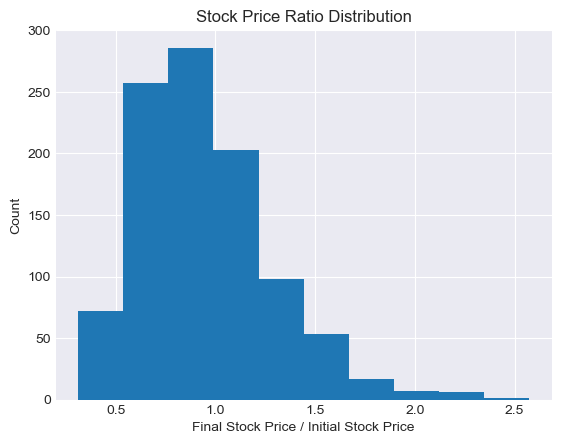

In [14]:

# Calculate the ratio between final and initial stock prices
stock_price_ratio = stock_prices[:, -1] / stock_prices[:, 0]

# Plot the histogram
plt.hist(stock_price_ratio, bins=10)  # Adjust the number of bins as needed
plt.xlabel('Final Stock Price / Initial Stock Price')
plt.ylabel('Count')
plt.title('Stock Price Ratio Distribution')
plt.show()